In [36]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATADIR = "../nabirds/"
IMAGEDIR = DATADIR + "images/"

In [3]:
# create the list for bird classes
idx2label = {}
with open(DATADIR+"classes.txt") as f:
    lines = f.readlines()
    
for l in lines:
    idx, name = l.split(' ', 1)
    idx2label[int(idx)] = name.split('\n')[0]

In [4]:
dirlist = os.listdir(IMAGEDIR)

In [5]:
df = pd.DataFrame({'id':['1'], # ID
                   'label': ['label'], # bird class
                   'nimage' :[1], # number of images per bird category
                   'path' : ['path'] # relative path to the directory
                  })

for i, d in enumerate(dirlist):
    path = os.path.join(IMAGEDIR, d)
    nimage = len(os.listdir(path))
    #print("{:30s} : {:10d} ".format(path, num))
    df.loc[i] = [d, idx2label[int(d)], nimage, path]

In [6]:
#df.set_index("id", inplace=True)
df.head()

,id,label,nimage,path
0,0337,Red-breasted Merganser (Breeding male),77,../nabirds/images/0337
1,0680,Red-headed Woodpecker (Immature),72,../nabirds/images/0680
2,0633,Barrow's Goldeneye (Female/Eclipse male),32,../nabirds/images/0633
3,0518,Surfbird,63,../nabirds/images/0518
4,0812,Black-capped Chickadee,96,../nabirds/images/0812


In [7]:
# sort it according to the number of images
ind = df['nimage'].argsort()
df.loc[ind][:5]

,id,label,nimage,path
385,0975,Dark-eyed Junco (White-winged),13,../nabirds/images/0975
218,0664,Purple Gallinule (Immature),21,../nabirds/images/0664
228,0341,Red-throated Loon (Breeding),23,../nabirds/images/0341
147,0755,Snow Bunting (Breeding adult),24,../nabirds/images/0755
151,1006,Fox Sparrow (Thick-billed/Slate-colored),25,../nabirds/images/1006


In [8]:
df.loc[df['id']=='0753']

,id,label,nimage,path
373,0753,American Robin (Adult),119,../nabirds/images/0753


In [9]:
ids = [753, 772, 852, 822]
df.loc[df['id'].isin(['{}'.format(i).zfill(4) for i in ids])]

,id,label,nimage,path
94,0852,Northern Mockingbird,120,../nabirds/images/0852
163,0772,Northern Cardinal (Adult Male),120,../nabirds/images/0772
373,0753,American Robin (Adult),119,../nabirds/images/0753
415,0822,Bushtit,120,../nabirds/images/0822


In [10]:
import os, shutil
from pathlib import Path

def createDir(dirpath):
    if os.path.isdir(dirpath):
        print("# Directory exists: {}".format(dirpath))
    else:
        os.mkdir(dirpath)
        print("# created {}".format(dirpath))

In [11]:
# create (cats, dogs) for (train, validation, test) dir
categories = ['{}'.format(i).zfill(4) for i in ids]
dirtypes = ['train', 'validation', 'test']

# The directory where we will
# store our smaller dataset
base_dir = './Data/'
createDir(base_dir)

dirnames = {}
for j, d in enumerate(dirtypes):
    dirname = d
    dirpath = os.path.join(base_dir, d)
    dirnames[dirname] = dirpath
    
    for c in categories:
        dirname = d+"_"+c
        subdirpath = os.path.join(dirpath, c)
        dirnames[dirname] = subdirpath

print("# Creating directories")
for k, v in dirnames.items():
    print("{} : {}".format(k,v))
    createDir(v)

# Directory exists: ./Data/
# Creating directories
train : ./Data/train
# Directory exists: ./Data/train
train_0753 : ./Data/train/0753
# Directory exists: ./Data/train/0753
train_0772 : ./Data/train/0772
# Directory exists: ./Data/train/0772
train_0852 : ./Data/train/0852
# Directory exists: ./Data/train/0852
train_0822 : ./Data/train/0822
# Directory exists: ./Data/train/0822
validation : ./Data/validation
# Directory exists: ./Data/validation
validation_0753 : ./Data/validation/0753
# Directory exists: ./Data/validation/0753
validation_0772 : ./Data/validation/0772
# Directory exists: ./Data/validation/0772
validation_0852 : ./Data/validation/0852
# Directory exists: ./Data/validation/0852
validation_0822 : ./Data/validation/0822
# Directory exists: ./Data/validation/0822
test : ./Data/test
# Directory exists: ./Data/test
test_0753 : ./Data/test/0753
# Directory exists: ./Data/test/0753
test_0772 : ./Data/test/0772
# Directory exists: ./Data/test/0772
test_0852 : ./Data/test/0852
# 

copy images from their original folder to the target folder
For each category (folder):
1.  obtain a list of images (filenames)
2. shuttle the list
3. pick the train/validate/test set according to the ratio
4. copy the images to the target location

In [12]:
def generateSplittedImageList(ID, ratios, showdir=True):
    """
    Generate the splitted image lists according to the ratios
    """
    # directory name for the ID
    dirname = df['path'].loc[df['id']==ID].to_string().split(' ')[-1]
    # list of images in the directory
    imagelist = os.listdir(dirname)
    # number of images
    nimage = len(imagelist)
   
    # generate a list of random integer for the image index
    idx = np.arange(nimage)
    np.random.shuffle(idx)
    # create the stop-index for making the cut (length = len(ratios) + 1)
    stop_idx = np.zeros((len(ratios)+1), dtype=int)
    stop_idx[1:] = np.int32(np.array(ratios) * nimage)
    stop_idx[-1] = nimage - stop_idx[:-1].sum() # fix the last number
    for i in range(1, len(stop_idx)):
        stop_idx[i] += stop_idx[i-1]
    print(dirname, nimage, stop_idx)
    
    idx_list = [idx[stop_idx[j]:stop_idx[j+1]] for j in range(len(ratios))  ]
    
    if showdir:
        return [[imagelist[i] for i in idx_list[j]] for j in range(len(ratios))], dirname
    else:
        return [[imagelist[i] for i in idx_list[j]] for j in range(len(ratios))]

In [13]:
imageList, imageDir = generateSplittedImageList('0753', ratios=[0.8, 0.1, 0.1])

../nabirds/images/0753 119 [  0  95 106 119]


In [14]:
dirtypes = ['train', 'validation', 'test']
dirtypes_ratios = [0.8, 0.1, 0.1]

for i in ids:
    ID = '{}'.format(i).zfill(4)
    imageList, imageDir = generateSplittedImageList(ID, dirtypes_ratios)
    
    
    for j, dt in enumerate(dirtypes):
        dirname = dt+"_"+ID
        print(dirname, dirnames[dirname])
        
        if os.path.isfile(dirnames[dirname]+"/COPYING_FINISHED"):
            print("# Images already copied before. Not copying now...")
        else:
            for image in imageList[j]:
                src = os.path.join(imageDir, image)
                dst = os.path.join(dirnames[dirname], image)
                shutil.copyfile(src, dst)
            Path(dirnames[dirname]+"/COPYING_FINISHED").touch()
        

../nabirds/images/0753 119 [  0  95 106 119]
train_0753 ./Data/train/0753
# Images already copied before. Not copying now...
validation_0753 ./Data/validation/0753
# Images already copied before. Not copying now...
test_0753 ./Data/test/0753
# Images already copied before. Not copying now...
../nabirds/images/0772 120 [  0  96 108 120]
train_0772 ./Data/train/0772
# Images already copied before. Not copying now...
validation_0772 ./Data/validation/0772
# Images already copied before. Not copying now...
test_0772 ./Data/test/0772
# Images already copied before. Not copying now...
../nabirds/images/0852 120 [  0  96 108 120]
train_0852 ./Data/train/0852
# Images already copied before. Not copying now...
validation_0852 ./Data/validation/0852
# Images already copied before. Not copying now...
test_0852 ./Data/test/0852
# Images already copied before. Not copying now...
../nabirds/images/0822 120 [  0  96 108 120]
train_0822 ./Data/train/0822
# Images already copied before. Not copying now

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,)
validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        dirnames['train'],
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        dirnames['validation'],
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        dirnames['test'],
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 383 images belonging to 4 classes.
Found 47 images belonging to 4 classes.
Found 49 images belonging to 4 classes.


In [27]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 4)


In [31]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [33]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=10)

Epoch 1/30
100/100 [==============================] - 36s 359ms/step - loss: 1.3470 - acc: 0.3394 - val_loss: 1.1832 - val_acc: 0.3665
Epoch 2/30
100/100 [==============================] - 33s 329ms/step - loss: 1.1057 - acc: 0.5018 - val_loss: 0.9822 - val_acc: 0.5528
Epoch 3/30
100/100 [==============================] - 33s 331ms/step - loss: 0.9794 - acc: 0.5702 - val_loss: 0.9483 - val_acc: 0.6273
Epoch 4/30
100/100 [==============================] - 33s 329ms/step - loss: 0.8654 - acc: 0.5859 - val_loss: 1.0112 - val_acc: 0.4596
Epoch 5/30
100/100 [==============================] - 33s 328ms/step - loss: 0.8204 - acc: 0.6350 - val_loss: 0.9329 - val_acc: 0.5466
Epoch 6/30
100/100 [==============================] - 33s 329ms/step - loss: 0.7904 - acc: 0.6501 - val_loss: 0.9177 - val_acc: 0.5528
Epoch 7/30
100/100 [==============================] - 33s 331ms/step - loss: 0.7727 - acc: 0.6627 - val_loss: 0.9598 - val_acc: 0.6149
Epoch 8/30
100/100 [==============================] - 3

In [20]:
?validation_datagen.flow_from_directory

In [34]:
history

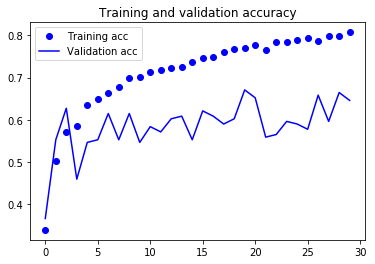

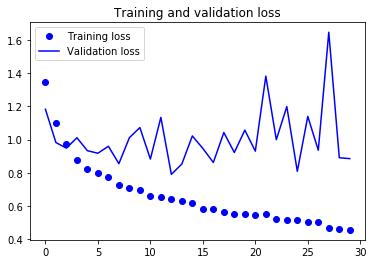

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [38]:
model.save_weights("bird4_weights.h5")